# Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler


In [ ]:
# 1. Define a suitable color palette
# Reverting to the first, slightly darker palette for better contrast at small sizes
colors = [
    '#e74c3c', # Alizarin Red
    '#3498db', # Peter River Blue
    '#27ae60', # Nephritis Green
    '#f1c40f', # Sunflower Yellow
    '#8e44ad', # Wisteria Purple
    '#e67e22', # Carrot Orange
]

# 2. Define the scaled-down rcParams dictionary
# All sizes are reduced by approx. 0.75
axes_label_color = "#4D4B4B"
mini_params = {
    # Figure setup (Reduced from 10x6 to 7.5x4.5)
    'figure.figsize': (7.5, 4.5),
    'figure.dpi': 120,
    'figure.facecolor': "#ACABAB55",
    
    # Axes setup
    'axes.facecolor': 'white',
    'axes.titlelocation': 'left',
    'axes.titlesize': 10,          # Reduced from 20
    'axes.titleweight': 'bold',
    'axes.labelsize': 8.5,          # Reduced from 14
    'axes.labelcolor': axes_label_color,
    'axes.linewidth': .75,         # Reduced from 1.5
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.prop_cycle': cycler(color=colors),
    
    # Tick setup
    'xtick.labelsize': 8,          # Reduced from 12
    'xtick.color': axes_label_color,
    'ytick.labelsize': 8,          # Reduced from 12
    'ytick.color': axes_label_color,
    
    # Grid setup
    'axes.grid': True,
    'grid.color': '#dddddd',
    'grid.linestyle': '-',
    'grid.linewidth': 0.6,         # Reduced from 0.8
    'grid.alpha': 0.7,
    'axes.axisbelow': True,
    
    # Font setup 
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    
    # Legend setup
    'legend.frameon': False,
    'legend.fontsize': 8,          # Reduced from 12
    
    # Line setup
    'lines.linewidth': 2,          # Reduced from 3
    'lines.solid_capstyle': 'round',
}

# Figure sizes
figsize_small = (5, 3)
figsize_medium = (7.5, 4.5)
figsize_large = (10, 6)

# 3. Apply the settings (e.g., for a test plot)
plt.rcParams.update(mini_params)

# --- Test Plot Example ---
# import numpy as np
# x = np.linspace(0, 10, 100)
# plt.figure(figsize=figsize_small)
# plt.plot(x, np.sin(x), label='Smaller Line 1')
# plt.plot(x, np.cos(x), label='Smaller Line 2')
# plt.title("Reduced Size Plot Example")
# plt.xlabel("Time (s)")
# plt.ylabel("Value")
# plt.legend()
# plt.show()

# Task description



## Intro 
Our company develops deep learning solutions to optimize radiologists’ workflow and expedite patient
care. This exercise will focus on the Intracranial hemorrhages (ICH) detection algorithm for CT scans – a
real life-saving algorithm implemented in dozens of sites across the world!

Three different algorithms have been developed, each was trained differently on the same dataset. We
have deployed the three of them in two different hospitals in order to examine their performances and
decide on the best way to use them.

In the hospital, a radiologist is examining (independently) the scans according to the scans queue (FIFO
prioritization). We can interfere with the order of the scans in acute situations (by prioritizing scans with
acute findings by the Aidoc algorithm). Furthermore, the radiologist may use our prediction (final result or
the marked findings on the scan) to decide on difficult findings. When he gets to a final decision, he can
conclude and sign the report.


## Task
You were assigned to a combined team containing product, AI, and data members. The team will need to
**measure the effectiveness of the algorithms** and **offer further insights to the product and operations
departments**.



## Questions
1. Examine the performances of each algorithm. We would like to hear your insights about them.
Tip: you're welcome to explore the common metrics for AI in this link (Specificity, Sensitivity, PPV
are must-haves).
2. Compare the performances and results of the various algorithms.
3. How would you suggest improving each algorithm? Please feel free to analyze the data from
different angles in order to get interesting and impactful insights.
4. You may create a document for planning future analysis - if you had more time which aspects
would you analyze, what further data you may want to look through, further processes you will
implement to make your analysis more valid, or other steps you would do and you didn’t have the
time.


## Data fields description



1. Accession - unique numbering of our data. Data that is not gathered by our CT algorithm will not
have it.
2. Site - hospital’s name.
3. patient_class- “ED” means it is an emergency department patient. “IN” means inpatient - regular
hospitalization.
4. Gender - patient’s gender.
5. Age - patient’s age.
6. Scan_timestamp - time of the actual scan (this field is saved automatically by the scanner).
7. radiologist_answer - the research’s ground truth. The radiologist interprets the scan by his own
list of priorities.
8. report_sign_time - the time in which the radiologist finished independently interpreting the scan.
9. Algos_start_run - each scan is uploaded to our server. Once it reaches the server, all algorithms
(1-3) analyze it in parallel. This field mentions the time they started analyzing the scan.
1. algoX_answer - positive (P) or negative(N) according to the findings in the scan.
2. algoX_finish_run - algorithm’s end of run time.

# Read the data

In [4]:
# Read data from Excel file
df = pd.read_excel("data.xlsx")

# Display the dataframe as HTML

df.head()

,Unnamed: 0,site,accession,patient_class,gender,age,scan_timestamp,radiologist_answer,radiologist_sign_time,algo1_answer,algos_start_run,algo1_finish_run,algo2_answer,algo2_finish_run,algo3_answer,algo3_finish_run
0,0,healthy_vibes,30990315,ED,male,32,2021-02-10 00:03:09,P,2021-02-10 00:14:36.366,P,2021-02-10 00:03:32.602,2021-02-10 00:04:12.854,P,2021-02-10 00:05:53.412,P,2021-02-10 00:08:26.271
1,1,healthy_vibes,90798806,ED,male,42,2021-09-30 14:38:46,P,2021-09-30 14:49:52.803,P,2021-09-30 14:39:11.101,2021-09-30 14:39:21.369,P,2021-09-30 14:41:28.623,P,2021-09-30 14:49:23.961
2,2,healthy_vibes,55615848,ED,male,43,2021-11-07 18:17:35,P,2021-11-07 18:25:39.923,P,2021-11-07 18:17:50.684,2021-11-07 18:18:20.917,P,2021-11-07 18:19:48.946,P,2021-11-07 18:29:59.415
3,3,healthy_vibes,91835094,ED,male,69,2021-04-25 13:17:30,P,2021-04-25 13:27:48.635,N,2021-04-25 13:17:59.040,2021-04-25 13:18:51.078,P,2021-04-25 13:21:08.207,P,2021-04-25 13:28:23.241
4,4,healthy_vibes,72427516,ED,male,38,2021-01-17 21:47:25,P,2021-01-17 21:56:13.500,N,2021-01-17 21:47:50.980,2021-01-17 21:48:26.594,P,2021-01-17 21:50:17.235,P,2021-01-17 21:59:58.341


# Prepare

In [5]:
# Calculate treatment duration (radiologist time from scan to sign)
df['treatment_duration'] = df['radiologist_sign_time'] - df['scan_timestamp']

# Calculate algorithm run durations for each algorithm
for algo in ['algo1', 'algo2', 'algo3']:
    df[f'{algo}_duration_min'] = round((df[f'{algo}_finish_run'] - df['algos_start_run']).dt.total_seconds() / 60, 2)

df['treatment_duration_min'] = round(df['treatment_duration'].dt.total_seconds() / 60, 2)


In [6]:
df.head()

,Unnamed: 0,site,accession,patient_class,gender,age,scan_timestamp,radiologist_answer,radiologist_sign_time,algo1_answer,...,algo1_finish_run,algo2_answer,algo2_finish_run,algo3_answer,algo3_finish_run,treatment_duration,algo1_duration_min,algo2_duration_min,algo3_duration_min,treatment_duration_min
0,0,healthy_vibes,30990315,ED,male,32,2021-02-10 00:03:09,P,2021-02-10 00:14:36.366,P,...,2021-02-10 00:04:12.854,P,2021-02-10 00:05:53.412,P,2021-02-10 00:08:26.271,0 days 00:11:27.366000,0.67,2.35,4.89,11.46
1,1,healthy_vibes,90798806,ED,male,42,2021-09-30 14:38:46,P,2021-09-30 14:49:52.803,P,...,2021-09-30 14:39:21.369,P,2021-09-30 14:41:28.623,P,2021-09-30 14:49:23.961,0 days 00:11:06.803000,0.17,2.29,10.21,11.11
2,2,healthy_vibes,55615848,ED,male,43,2021-11-07 18:17:35,P,2021-11-07 18:25:39.923,P,...,2021-11-07 18:18:20.917,P,2021-11-07 18:19:48.946,P,2021-11-07 18:29:59.415,0 days 00:08:04.923000,0.50,1.97,12.15,8.08
3,3,healthy_vibes,91835094,ED,male,69,2021-04-25 13:17:30,P,2021-04-25 13:27:48.635,N,...,2021-04-25 13:18:51.078,P,2021-04-25 13:21:08.207,P,2021-04-25 13:28:23.241,0 days 00:10:18.635000,0.87,3.15,10.40,10.31
4,4,healthy_vibes,72427516,ED,male,38,2021-01-17 21:47:25,P,2021-01-17 21:56:13.500,N,...,2021-01-17 21:48:26.594,P,2021-01-17 21:50:17.235,P,2021-01-17 21:59:58.341,0 days 00:08:48.500000,0.59,2.44,12.12,8.81


# Data integrity checks

In [7]:
df.describe()

,Unnamed: 0,accession,age,scan_timestamp,radiologist_sign_time,algos_start_run,algo1_finish_run,algo2_finish_run,algo3_finish_run,treatment_duration,algo1_duration_min,algo2_duration_min,algo3_duration_min,treatment_duration_min
count,20000.000000,2.000000e+04,20000.000000,20000,20000,20000,20000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,4.991990e+07,48.477350,2021-06-18 09:16:03.345849856,2021-06-18 09:26:22.438008320,2021-06-18 09:16:38.777934336,2021-06-18 09:17:23.768539904,2021-06-18 09:19:08.697431040,2021-06-18 09:26:40.146345472,0 days 00:10:19.092158300,0.749842,2.498656,10.022811,10.318186
min,0.000000,1.886000e+03,5.000000,2021-01-02 00:04:02,2021-01-02 00:14:28.638000,2021-01-02 00:05:19.071000,2021-01-02 00:05:53.265000,2021-01-02 00:07:23.076000,2021-01-02 00:17:15.535000,-1 days +23:59:43.768000,-0.230000,0.470000,2.440000,-0.270000
25%,4999.750000,2.501550e+07,35.000000,2021-03-27 20:43:11.500000,2021-03-27 20:51:57.107749888,2021-03-27 20:43:38.599000064,2021-03-27 20:44:36.939000064,2021-03-27 20:46:00.040000,2021-03-27 20:51:48.069499904,0 days 00:08:42.141500,0.580000,2.170000,8.650000,8.700000
50%,9999.500000,4.998134e+07,49.000000,2021-06-18 02:13:13.500000,2021-06-18 02:24:01.587500032,2021-06-18 02:13:55.671000064,2021-06-18 02:14:57.073500160,2021-06-18 02:15:53.548999936,2021-06-18 02:23:14.140499968,0 days 00:10:09.356500,0.750000,2.500000,10.030000,10.160000
75%,14999.250000,7.484258e+07,63.000000,2021-09-09 20:31:40,2021-09-09 20:42:37.986249984,2021-09-09 20:32:07.103249920,2021-09-09 20:33:06.017250048,2021-09-09 20:35:16.030749952,2021-09-09 20:41:49.962749952,0 days 00:11:46.574750,0.920000,2.830000,11.370000,11.780000
max,19999.000000,9.998835e+07,86.000000,2021-11-30 23:19:51,2021-11-30 23:32:13.026000,2021-11-30 23:20:08.954000,2021-11-30 23:20:52.209000,2021-11-30 23:22:55.541000,2021-11-30 23:27:54.930000,0 days 00:20:16.433000,1.720000,4.590000,18.060000,20.270000
std,5773.647028,2.892198e+07,17.883109,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:26.836989880,0.250378,0.499330,2.008593,2.447332


In [8]:
df.isnull().sum()


Unnamed: 0                0
site                      0
accession                 0
patient_class             0
gender                    0
age                       0
scan_timestamp            0
radiologist_answer        0
radiologist_sign_time     0
algo1_answer              0
algos_start_run           0
algo1_finish_run          0
algo2_answer              0
algo2_finish_run          0
algo3_answer              0
algo3_finish_run          0
treatment_duration        0
algo1_duration_min        0
algo2_duration_min        0
algo3_duration_min        0
treatment_duration_min    0
dtype: int64

In [9]:
# Show rows where algox_duration_min is negative
# algo_duration_cols = 
for algo in ['1', '2', '3']:
    print(
        df[
            df[[f'algo{algo}_duration_min']].lt(0).any(axis=1)
        ][
            [
                'algos_start_run', 
                f'algo{algo}_finish_run',
                f'algo{algo}_duration_min',  
            ]
        ]
    )

              algos_start_run        algo1_finish_run  algo1_duration_min
892   2021-05-31 00:31:33.766 2021-05-31 00:31:32.932               -0.01
3796  2021-05-31 13:05:36.815 2021-05-31 13:05:23.294               -0.23
3882  2021-03-27 06:08:05.041 2021-03-27 06:08:03.498               -0.03
4415  2021-09-20 10:39:27.840 2021-09-20 10:39:22.340               -0.09
4928  2021-08-21 23:50:30.149 2021-08-21 23:50:25.091               -0.08
7953  2021-02-20 15:55:30.389 2021-02-20 15:55:25.899               -0.07
8920  2021-04-14 16:25:08.455 2021-04-14 16:24:59.414               -0.15
9015  2021-07-28 04:51:12.733 2021-07-28 04:50:58.865               -0.23
11438 2021-07-04 09:57:02.885 2021-07-04 09:56:59.870               -0.05
12090 2021-10-10 16:22:42.282 2021-10-10 16:22:35.375               -0.12
12273 2021-04-08 17:50:18.418 2021-04-08 17:50:15.263               -0.05
12368 2021-05-11 08:33:15.698 2021-05-11 08:33:09.899               -0.10
12448 2021-01-11 10:14:15.317 2021-01-

# Duration statistics 

## Functions

In [38]:
from typing import List


def compute_duration_stats(
        df: pd.DataFrame,
        algo_col: str
) -> pd.DataFrame:
    """
    Return summary stats (minutes) for algorithm run durations.

    Expects precomputed duration columns (e.g., 'algo1_duration_min').
    """
    stats = {
        'mean': df[algo_col].mean(),
        'std': df[algo_col].std(),
        'min': df[algo_col].min(),
        'median': df[algo_col].median(),
        'max': df[algo_col].max(),
        'p25': df[algo_col].quantile(0.25),
        'p75': df[algo_col].quantile(0.75),
    }
    return pd.Series(stats)


# Example usage
compute_duration_stats(df, f'algo1_duration_min')


mean      0.749842
std       0.250378
min      -0.230000
median    0.750000
max       1.720000
p25       0.580000
p75       0.920000
dtype: float64

In [12]:
def plot_duration_summary(
        df: pd.DataFrame,
        algos: list = None,
        stat_names: list = None,
        figsize=figsize_small,
        title: str = 'Algorithm Duration (min): min/mean/max',
        highlight_algo: str = None,
        # **kwargs,
        **plt_kwargs
):
    """
    Show mean/median/max duration per algorithm with a summary table and grouped bar chart.
    Uses compute_duration_stats for consistency.
    
    Parameters:
    -----------
    highlight_algo : str, optional
        Algorithm name to highlight (e.g., 'algo1'). Highlighted bars will have
        thicker border and subtle shadow effect.
    """


    if algos is None:
        algos = ['algo1', 'algo2', 'algo3']
    if stat_names is None:
        stat_names = ['min', 'mean', 'max']

    # Build stats DataFrame via compute_duration_stats
    stats_rows = []
    for algo in algos:
        col = f'{algo}_duration_min'
        stats_series = compute_duration_stats(df, col)
        stats_rows.append(stats_series[stat_names].to_dict())

    duration_stats_df = pd.DataFrame(stats_rows, index=algos)
    duration_stats_df_round = duration_stats_df.round(2)

    # Plot grouped bar chart using pyplot
    fig, ax = plt.subplots(figsize=figsize)

    x = range(len(algos))
    width = 0.25
    
    # Add pink rectangle behind highlighted algorithm
    if highlight_algo and highlight_algo in algos:
        from matplotlib.patches import Rectangle
        highlight_idx = algos.index(highlight_algo)
        rect_width = 0.85
        rect = Rectangle(
            (highlight_idx - rect_width/2, 0),
            rect_width,
            duration_stats_df.values.max() * 1.2,
            facecolor='pink',
            alpha=0.2,
            zorder=0
        )
        ax.add_patch(rect)

    for i, stat in enumerate(stat_names):
        values = duration_stats_df[stat].values
        offset = (i - len(stat_names)/2 + 0.5) * width
        bars = ax.bar(
            [xi + offset for xi in x],
            values, 
            width, 
            label=stat, 
            alpha=0.85, 
            edgecolor='white', 
            linewidth=0.5,
        )
        
        # annotate values on bars
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, h + 0.02, f"{h:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Algorithm', fontsize=11)
    ax.set_ylabel('Minutes', fontsize=11)
    ax.set_xticks(list(x))
    ax.set_xticklabels(algos)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, duration_stats_df.values.max() * 1.2)

    ax.legend(title='Stat', loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=9)


    plt.tight_layout()
    
    return fig





# Example usage
# fig = plot_duration_summary(df)

## Entire dataset - mean duration

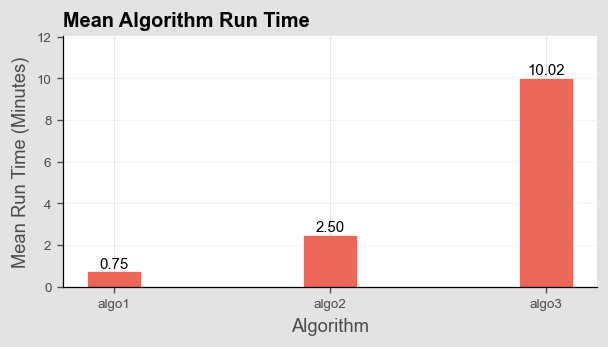

In [13]:
fig = plot_duration_summary(
    df,
    stat_names=['mean'],
    title='Mean Algorithm Run Time',
    figsize=(6, 3)
)

ax = fig.get_axes()[0]

ax.get_legend().remove()
ax.set_ylabel('Mean Run Time (Minutes)', fontsize=11)


fig.savefig('images/algo_mean_run_time.png', dpi=150, bbox_inches='tight')  


## by patient class


Patient class: ED, n=5528
Patient class: IN, n=14472


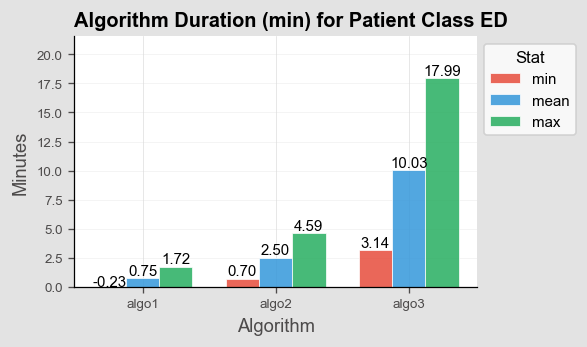

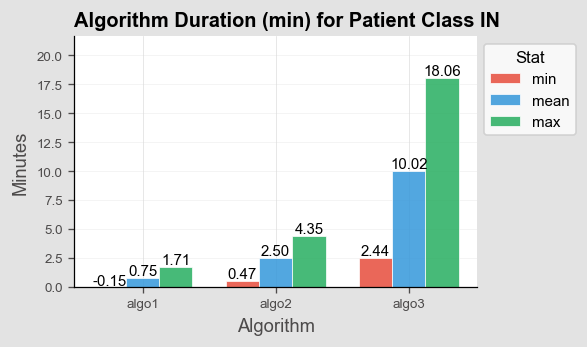

In [14]:

for pclass in df['patient_class'].unique():
    df_group = df[df['patient_class'] == pclass]
    print(f"Patient class: {pclass}, n={len(df_group)}")
    plot_duration_summary(df_group, title=f'Algorithm Duration (min) for Patient Class {pclass}')

# Performance

## Functions

### Metrics functions

In [15]:
from typing import Tuple, Dict


def compute_confusion(
        y_true: pd.Series, 
        y_pred: pd.Series, 
        positive: str = 'P'
) -> Tuple[int, int, int, int]:
    """
    Return tp, fp, tn, fn counts for binary labels.

    Assumes labels are strings like 'P'/'N'. Anything not equal to `positive`
    is treated as negative.
    """
    y_true_pos = y_true == positive
    y_pred_pos = y_pred == positive

    tp = ((y_true_pos) & (y_pred_pos)).sum()
    fp = ((~y_true_pos) & (y_pred_pos)).sum()
    tn = ((~y_true_pos) & (~y_pred_pos)).sum()
    fn = ((y_true_pos) & (~y_pred_pos)).sum()
    return int(tp), int(fp), int(tn), int(fn)


def compute_metrics(
        y_true: pd.Series,
        y_pred: pd.Series, 
        positive: str = 'P',
        metrics: list = ['sensitivity', 'specificity', 'ppv'],
) -> Dict[str, float]:
    """Compute sensitivity, specificity, and PPV with safe division."""
    tp, fp, tn, fn = compute_confusion(y_true, y_pred, positive=positive)

    sensitivity = tp / (tp + fn) if (tp + fn) else float('nan')  # aka recall
    specificity = tn / (tn + fp) if (tn + fp) else float('nan')
    ppv = tp / (tp + fp) if (tp + fp) else float('nan')  # precision

    metrics_dict = {
        'sensitivity': round(sensitivity, 3),
        'specificity': round(specificity, 3),
        'ppv': round(ppv, 3),
    }
    return {metric: metrics_dict[metric] for metric in metrics if metric in metrics_dict}


def evaluate_algorithm(
        df: pd.DataFrame, 
        pred_col: str, 
        label_col: str = 'radiologist_answer', 
        positive: str = 'P',
        metrics=['sensitivity', 'specificity', 'ppv']
) -> pd.Series:
    """Compute metrics for a prediction column against the label column."""
    metrics = compute_metrics(
        df[label_col],
        df[pred_col], 
        positive=positive,
        metrics=metrics
    )
    return pd.Series(metrics)


# example usage
evaluate_algorithm(df, pred_col='algo1_answer', metrics=['sensitivity'])

sensitivity    0.507
dtype: float64

### Plot function

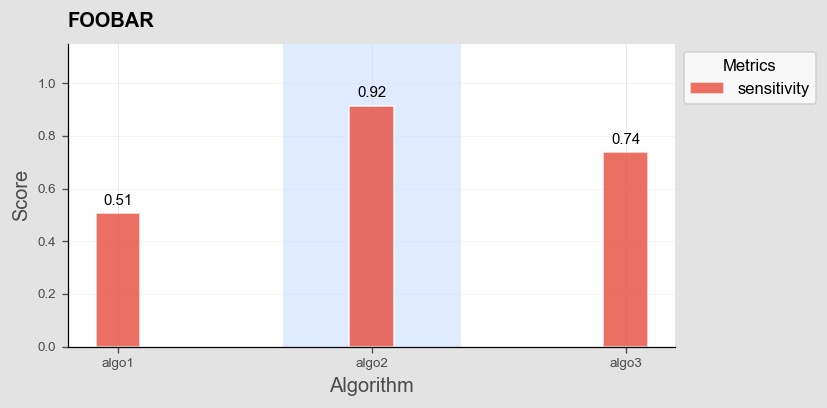

In [16]:
def plot_metrics_per_algo(
        metrics_df: pd.DataFrame,
        highlight_algo: str = None,
        **kwargs
) -> plt.Figure:
    """
    Plot algorithm metrics (sensitivity, specificity, PPV) as a grouped bar chart.
    
    Parameters:
    -----------
    metrics_df : pd.DataFrame
        DataFrame with algorithm names as index and metrics as columns
        (e.g., sensitivity, specificity, ppv)
    colors : dict, optional
        Dictionary mapping algorithm names to colors. If None, uses default colors.
    """
    
    # Set parameters
    title = kwargs.get('title', 'Algorithm Performance Metrics Comparison')
    figsize = kwargs.get('figsize', figsize_small)

    # Melt DataFrame to long format
    metrics_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
    metrics_melted.rename(columns={'index': 'Algorithm'}, inplace=True)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create grouped bar chart using pyplot
    algorithms = metrics_melted['Algorithm'].unique()
    metrics = metrics_melted['Metric'].unique()
    x = range(len(algorithms))
    width = 0.175
    
    # Add pink rectangle behind highlighted algorithm
    if highlight_algo and highlight_algo in algorithms:
        from matplotlib.patches import Rectangle
        highlight_idx = list(algorithms).index(highlight_algo)
        rect_width = 0.7
        rect = Rectangle(
            (highlight_idx - rect_width/2, 0),
            rect_width,
            1.15,
            facecolor="#c0d9ff", #'#ffc0cb',
            alpha=0.5,
            zorder=0
        )
        ax.add_patch(rect)
    
    for i, metric in enumerate(metrics):
        metric_data = metrics_melted[metrics_melted['Metric'] == metric]
        offset = (i - len(metrics) / 2 + 0.5) * width
        bars = ax.bar([xi + offset for xi in x], metric_data['Score'].values, width, label=metric, alpha=0.8, edgecolor='white', linewidth=1)
        # Annotate each bar with its height
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.02,
                f"{height:.2f}",
                ha='center',
                va='bottom',
                fontsize=9,
            )

    ax.set_title(title, fontsize=12, pad=10)
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_ylim(0, 1.15)
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms)
    ax.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    return fig


# Example usage
metrics_list = []
for algo in ['algo1', 'algo2', 'algo3']:
    metrics = evaluate_algorithm(df, pred_col=f'{algo}_answer', metrics=['sensitivity'])
    metrics_list.append(metrics)
metrics_df = pd.DataFrame(metrics_list, index=['algo1', 'algo2', 'algo3'])
    
f = plot_metrics_per_algo(
    metrics_df,
    title = 'FOOBAR',
    highlight_algo='algo2',
    figsize=(7, 3.5)
)


## Overall 

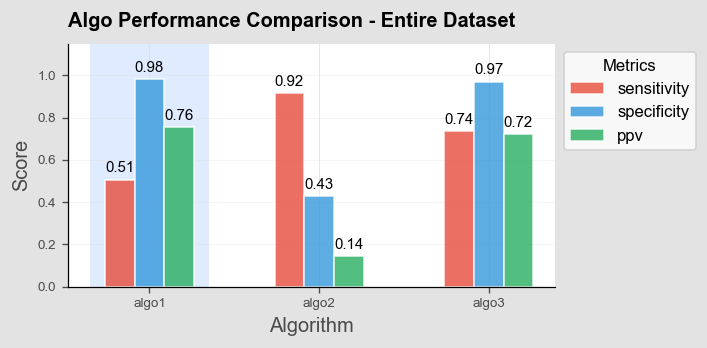

In [17]:
metrics_list = []
for algo in ['algo1', 'algo2', 'algo3']:
    metrics = evaluate_algorithm(df, pred_col=f'{algo}_answer')
    metrics_list.append(metrics)
metrics_df = pd.DataFrame(metrics_list, index=['algo1', 'algo2', 'algo3'])

highlight_algo='algo1'    
fig = plot_metrics_per_algo(
    metrics_df,
    title = 'Algo Performance Comparison - Entire Dataset',
    figsize=((6, 3)),
    highlight_algo=highlight_algo,
)

fig.savefig(f'images/algo_compare_overall_highlight_{highlight_algo}.png', dpi=120, bbox_inches='tight')

## Per site (hospital)


In [18]:
df.head(5)

,Unnamed: 0,site,accession,patient_class,gender,age,scan_timestamp,radiologist_answer,radiologist_sign_time,algo1_answer,...,algo1_finish_run,algo2_answer,algo2_finish_run,algo3_answer,algo3_finish_run,treatment_duration,algo1_duration_min,algo2_duration_min,algo3_duration_min,treatment_duration_min
0,0,healthy_vibes,30990315,ED,male,32,2021-02-10 00:03:09,P,2021-02-10 00:14:36.366,P,...,2021-02-10 00:04:12.854,P,2021-02-10 00:05:53.412,P,2021-02-10 00:08:26.271,0 days 00:11:27.366000,0.67,2.35,4.89,11.46
1,1,healthy_vibes,90798806,ED,male,42,2021-09-30 14:38:46,P,2021-09-30 14:49:52.803,P,...,2021-09-30 14:39:21.369,P,2021-09-30 14:41:28.623,P,2021-09-30 14:49:23.961,0 days 00:11:06.803000,0.17,2.29,10.21,11.11
2,2,healthy_vibes,55615848,ED,male,43,2021-11-07 18:17:35,P,2021-11-07 18:25:39.923,P,...,2021-11-07 18:18:20.917,P,2021-11-07 18:19:48.946,P,2021-11-07 18:29:59.415,0 days 00:08:04.923000,0.50,1.97,12.15,8.08
3,3,healthy_vibes,91835094,ED,male,69,2021-04-25 13:17:30,P,2021-04-25 13:27:48.635,N,...,2021-04-25 13:18:51.078,P,2021-04-25 13:21:08.207,P,2021-04-25 13:28:23.241,0 days 00:10:18.635000,0.87,3.15,10.40,10.31
4,4,healthy_vibes,72427516,ED,male,38,2021-01-17 21:47:25,P,2021-01-17 21:56:13.500,N,...,2021-01-17 21:48:26.594,P,2021-01-17 21:50:17.235,P,2021-01-17 21:59:58.341,0 days 00:08:48.500000,0.59,2.44,12.12,8.81


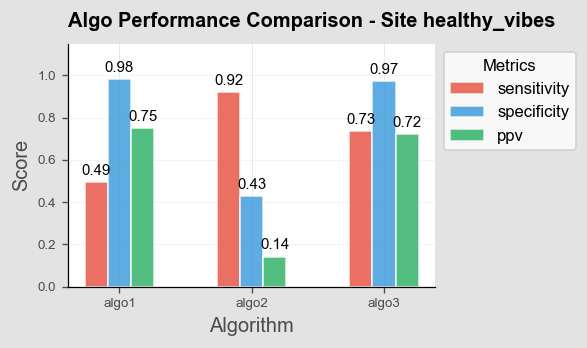

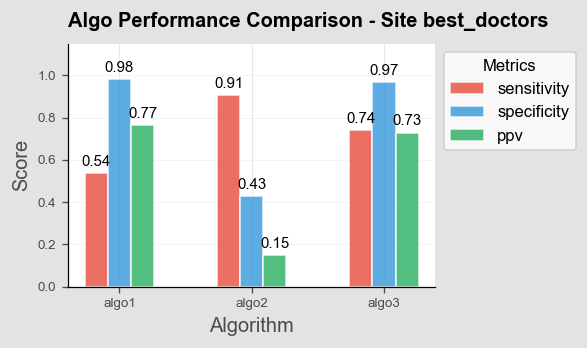

In [19]:
for site in df['site'].unique():
    metrics_list = []
    for algo in ['algo1', 'algo2', 'algo3']:
        site_df = df[df['site'] == site]
        metrics = evaluate_algorithm(site_df, pred_col=f'{algo}_answer')
        metrics_list.append(metrics)
    metrics_df = pd.DataFrame(metrics_list, index=['algo1', 'algo2', 'algo3'])
    plot_metrics_per_algo(
        metrics_df,
        title=f'Algo Performance Comparison - Site {site}',
        figsize=figsize_small
    )


## By patient_class

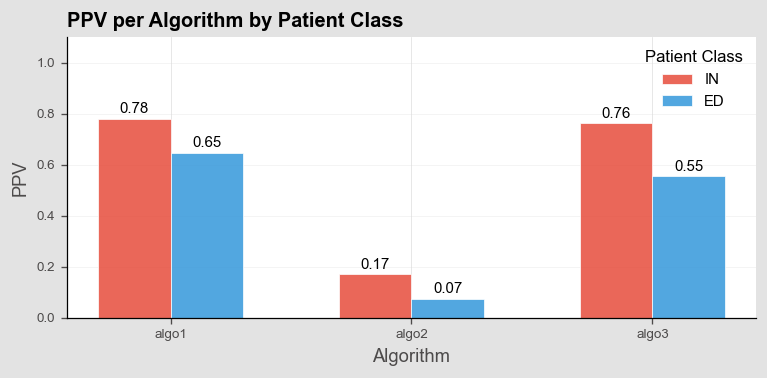

In [20]:
algos = ['algo1', 'algo2', 'algo3']
# Force order: IN before ED (only include those present)
classes = [c for c in ['IN', 'ED'] if c in df['patient_class'].unique()]

# Build PPV table: rows=classes, cols=algorithms
ppv_data = {}
for algo in algos:
    ppv_vals = []
    for cls in classes:
        cls_df = df[df['patient_class'] == cls]
        m = evaluate_algorithm(cls_df, pred_col=f'{algo}_answer', metrics=['ppv'])
        ppv_vals.append(m['ppv'])
    ppv_data[algo] = ppv_vals

ppv_df = pd.DataFrame(ppv_data, index=classes)

# Plot: grouped bars per algorithm, each bar is a class PPV
fig, ax = plt.subplots(figsize=(6.5, 3.25))
x = range(len(algos))
width = 0.3 if len(classes) == 2 else 0.1

for i, cls in enumerate(classes):
    values = ppv_df.loc[cls, algos].values
    offset = (i - len(classes)/2 + 0.5) * width
    bars = ax.bar([xi + offset for xi in x], values, width, label=str(cls), alpha=0.85, edgecolor='white', linewidth=0.5)
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.2f}", ha='center', va='bottom', fontsize=9)

ax.set_title('PPV per Algorithm by Patient Class', fontsize=12)
ax.set_xlabel('Algorithm', fontsize=11)
ax.set_ylabel('PPV', fontsize=11)
ax.set_xticks(list(x))
ax.set_xticklabels(algos)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Patient Class', fontsize=9)
plt.tight_layout()

fig.savefig('images/ppv_per_algo_by_class.png', dpi=120, bbox_inches='tight')

## By age group

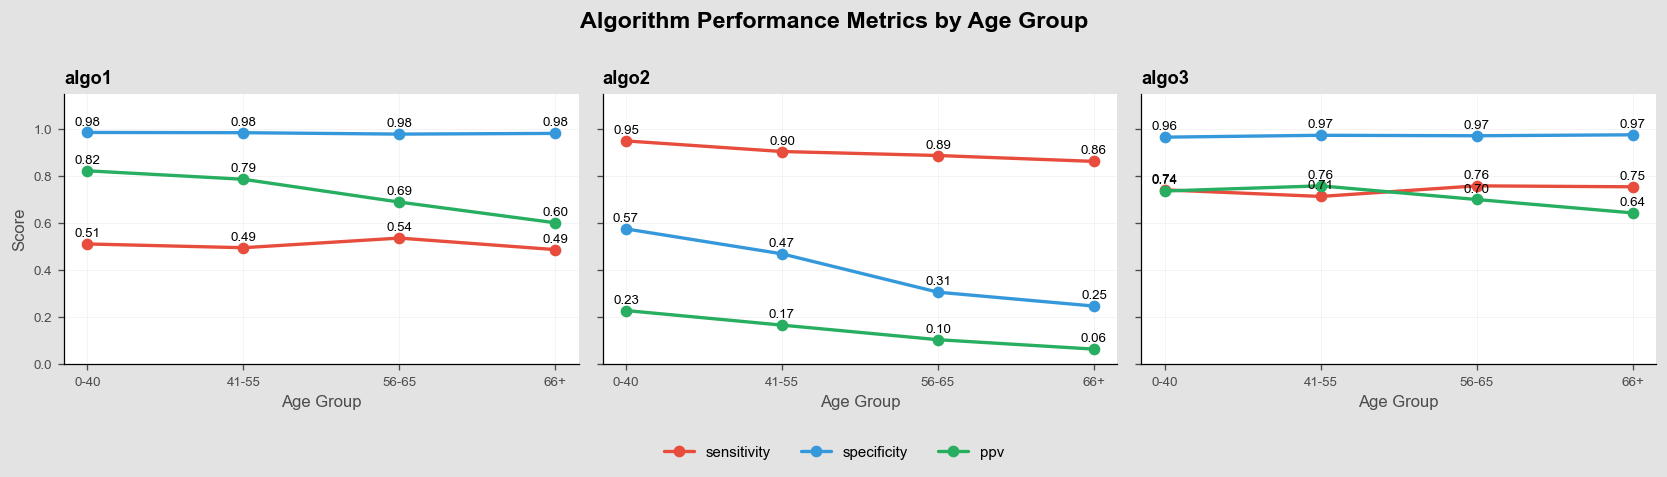

In [22]:
algos = ['algo1', 'algo2', 'algo3']
metric_names = ['sensitivity', 'specificity', 'ppv']

# Ensure age groups are present (created earlier) and ordered
age_group_order = ['0-40', '41-55', '56-65', '66+']
age_groups_present = [ag for ag in age_group_order if ag in df['age_group'].unique()]

# Create side-by-side plots with shared y-axis
fig, axes = plt.subplots(1, len(algos), figsize=(14, 3.75), sharey=True)

for i, algo in enumerate(algos):
    ax = axes[i]
    for metric in metric_names:
        values = []
        for ag in age_groups_present:
            age_df = df[df['age_group'] == ag]
            m = evaluate_algorithm(age_df, pred_col=f'{algo}_answer', metrics=[metric])
            values.append(m[metric])
        ax.plot(range(len(age_groups_present)), values, marker='o', label=metric, linewidth=2, markersize=6)
        # Annotate points
        for j, val in enumerate(values):
            ax.text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

    ax.set_title(f'{algo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Age Group', fontsize=10)
    ax.set_xticks(range(len(age_groups_present)))
    ax.set_xticklabels(age_groups_present)
    ax.grid(True, alpha=0.3)

# Shared y-axis setup
axes[0].set_ylabel('Score', fontsize=10)
axes[0].set_ylim(0, 1.15)

# Single legend for all subplots
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=9, bbox_to_anchor=(0.5, -0.1))

fig.suptitle('Algorithm Performance Metrics by Age Group', fontsize=14, fontweight='bold', y=.925,)

plt.tight_layout(rect=(0, 0, 1, 0.92))
fig.savefig('images/metrics_by_age_side_by_side.png', dpi=150, bbox_inches='tight')
plt.show()

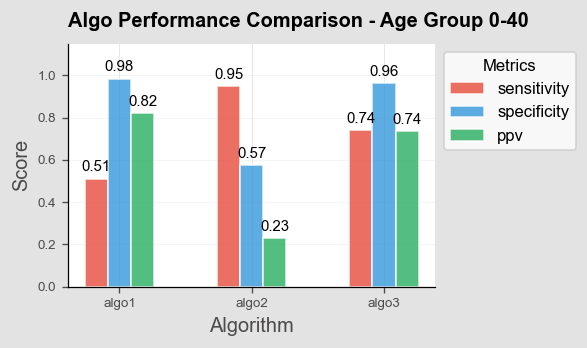

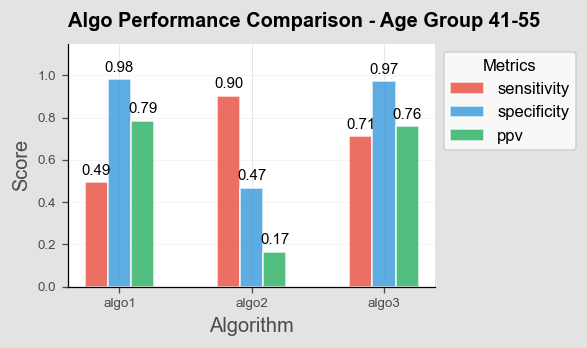

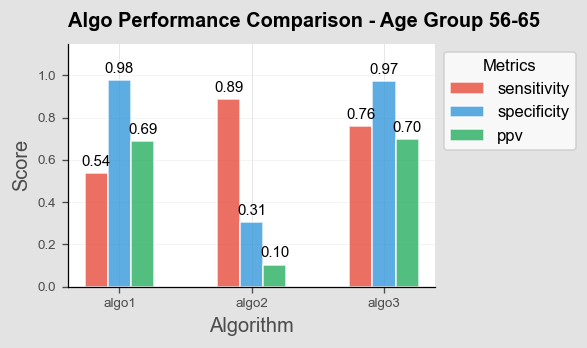

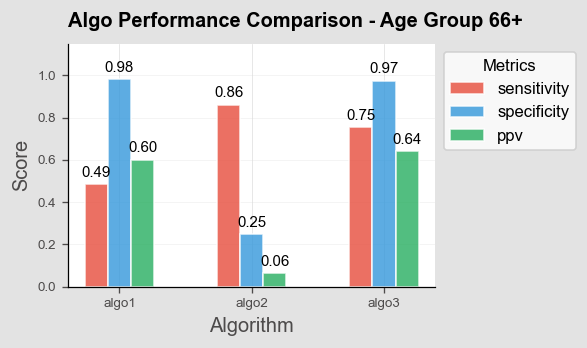

In [21]:
# divide age into groups
age_bins = [0, 41, 56,  66, 100]
age_labels = ['0-40', '41-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Ensure plotting follows the defined age_labels order
for age_group in age_labels:
    if age_group not in df['age_group'].unique():
        continue
    metrics_list = []
    for algo in ['algo1', 'algo2', 'algo3']:
        age_df = df[df['age_group'] == age_group]
        metrics = evaluate_algorithm(age_df, pred_col=f'{algo}_answer')
        metrics_list.append(metrics)
    metrics_df = pd.DataFrame(metrics_list, index=['algo1', 'algo2', 'algo3'])
    plot_metrics_per_algo(
        metrics_df,
        title=f'Algo Performance Comparison - Age Group {age_group}',
        figsize=figsize_small,
    )


# Evaluate superAlgo

## Compute superAlgo predictions

In [ ]:
def compute_superalgo(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute superAlgo answer and runtime based on a sequential decision workflow:
    
    1. If algo1 is positive (P) -> answer is P, runtime = algo1 runtime
    2. If algo1 is negative (N) and algo2 is negative (N) -> answer is N, runtime = max(algo1, algo2) runtime
    3. If algo2 is positive (P) -> answer = algo3 answer, runtime = algo3 runtime
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing algo1_answer, algo2_answer, algo3_answer and their corresponding
        duration columns (algo1_duration_min, algo2_duration_min, algo3_duration_min)
    
    Returns:
    --------
    pd.DataFrame
        Original DataFrame with two new columns added:
        - superalgo_answer: 'P' or 'N'
        - superalgo_duration_min: runtime in minutes
    """
    df = df.copy()
    df['superalgo_answer'] = 'N'
    df['superalgo_duration_min'] = 0.0
    
    for idx, row in df.iterrows():
        algo1_answer = row['algo1_answer']
        algo2_answer = row['algo2_answer']
        algo3_answer = row['algo3_answer']
        
        algo1_duration = row['algo1_duration_min']
        algo2_duration = row['algo2_duration_min']
        algo3_duration = row['algo3_duration_min']
        
        # Rule 1: If algo1 is positive, answer is positive, runtime = algo1 runtime
        if algo1_answer == 'P':
            df.at[idx, 'superalgo_answer'] = 'P'
            df.at[idx, 'superalgo_duration_min'] = algo1_duration
        
        # Rule 2: If algo1 is negative and algo2 is negative, answer is negative
        elif algo1_answer == 'N' and algo2_answer == 'N':
            df.at[idx, 'superalgo_answer'] = 'N'
            # Runtime is the maximum of algo1 and algo2 (the slowest)
            df.at[idx, 'superalgo_duration_min'] = max(algo1_duration, algo2_duration)
        
        # Rule 3: If algo2 is positive, use algo3 answer and runtime
        elif algo2_answer == 'P':
            df.at[idx, 'superalgo_answer'] = algo3_answer
            df.at[idx, 'superalgo_duration_min'] = algo3_duration
    
    return df


SuperAlgo results (first 10 rows):


,algo1_answer,algo2_answer,algo3_answer,superalgo_answer,algo1_duration_min,algo2_duration_min,algo3_duration_min,superalgo_duration_min
0,P,P,P,P,0.67,2.35,4.89,0.67
1,P,P,P,P,0.17,2.29,10.21,0.17
2,P,P,P,P,0.50,1.97,12.15,0.50
3,N,P,P,P,0.87,3.15,10.40,10.40
4,N,P,P,P,0.59,2.44,12.12,12.12
...,...,...,...,...,...,...,...,...
95,P,P,P,P,0.98,2.59,16.03,0.98
96,N,P,P,P,1.02,3.43,11.95,11.95
97,P,P,P,P,0.55,2.48,10.75,0.55
98,P,P,P,P,0.50,2.41,10.56,0.50


## Compute metrics

In [ ]:


# Apply the function to compute superalgo
df_w_super = compute_superalgo(df)

# Display sample results
print("SuperAlgo results (first 10 rows):")
df_w_super[
    [
        'algo1_answer', 
        'algo2_answer', 
        'algo3_answer', 
        'superalgo_answer', 
        'algo1_duration_min', 
        'algo2_duration_min', 
        'algo3_duration_min', 
        'superalgo_duration_min'
    ]
].head(100)



SuperAlgo results (first 10 rows):
SuperAlgo Performance Metrics:
sensitivity    0.766
specificity    0.971
ppv            0.737
dtype: float64


## Run duration

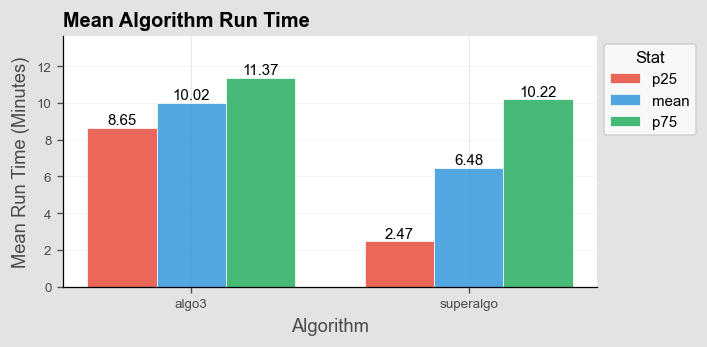

In [48]:
fig = plot_duration_summary(
    df_w_super,
    algos=['algo3', 'superalgo'],
    stat_names=[ 'p25', 'mean', 'p75'],
    title='Mean Algorithm Run Time',
    figsize=(6, 3)
)

ax = fig.get_axes()[0]

# ax.get_legend().remove()
ax.set_ylabel('Mean Run Time (Minutes)', fontsize=11)


fig.savefig('images/algo_mean_run_time_w_super.png', dpi=150, bbox_inches='tight')  


## Performance over entire dataset

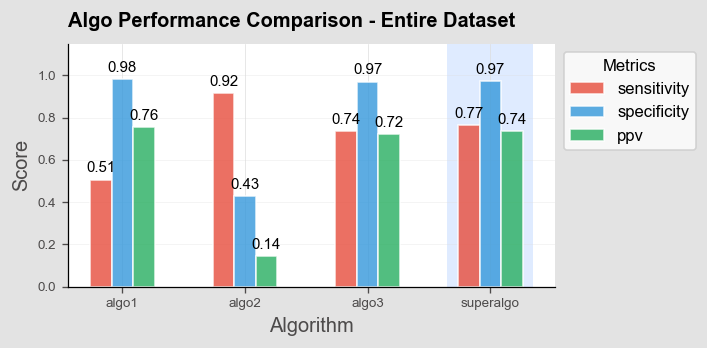

In [37]:
metrics_list = []
for algo in ['algo1', 'algo2', 'algo3', 'superalgo']:
    metrics = evaluate_algorithm(df, pred_col=f'{algo}_answer')
    metrics_list.append(metrics)
metrics_df = pd.DataFrame(metrics_list, index=['algo1', 'algo2', 'algo3', 'superalgo'])

highlight_algo='superalgo'    
fig = plot_metrics_per_algo(
    metrics_df,
    title = 'Algo Performance Comparison - Entire Dataset',
    figsize=((6, 3)),
    highlight_algo=highlight_algo,
)

fig.savefig(f'images/algo_compare_overall_highlight_{highlight_algo}.png', dpi=120, bbox_inches='tight')

## Performance by patient_class

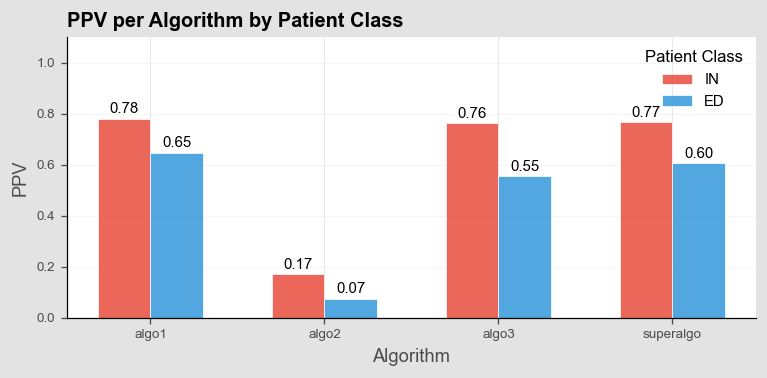

In [33]:
algos = ['algo1', 'algo2', 'algo3', 'superalgo']
# Force order: IN before ED (only include those present)
classes = [c for c in ['IN', 'ED'] if c in df['patient_class'].unique()]

# Build PPV table: rows=classes, cols=algorithms
ppv_data = {}
for algo in algos:
    ppv_vals = []
    for cls in classes:
        cls_df = df[df['patient_class'] == cls]
        m = evaluate_algorithm(cls_df, pred_col=f'{algo}_answer', metrics=['ppv'])
        ppv_vals.append(m['ppv'])
    ppv_data[algo] = ppv_vals

ppv_df = pd.DataFrame(ppv_data, index=classes)

# Plot: grouped bars per algorithm, each bar is a class PPV
fig, ax = plt.subplots(figsize=(6.5, 3.25))
x = range(len(algos))
width = 0.3 if len(classes) == 2 else 0.1

for i, cls in enumerate(classes):
    values = ppv_df.loc[cls, algos].values
    offset = (i - len(classes)/2 + 0.5) * width
    bars = ax.bar([xi + offset for xi in x], values, width, label=str(cls), alpha=0.85, edgecolor='white', linewidth=0.5)
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.2f}", ha='center', va='bottom', fontsize=9)

ax.set_title('PPV per Algorithm by Patient Class', fontsize=12)
ax.set_xlabel('Algorithm', fontsize=11)
ax.set_ylabel('PPV', fontsize=11)
ax.set_xticks(list(x))
ax.set_xticklabels(algos)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Patient Class', fontsize=9)
plt.tight_layout()

fig.savefig('images/ppv_per_algo_by_class_w_super.png', dpi=120, bbox_inches='tight')

## Performance by age group 

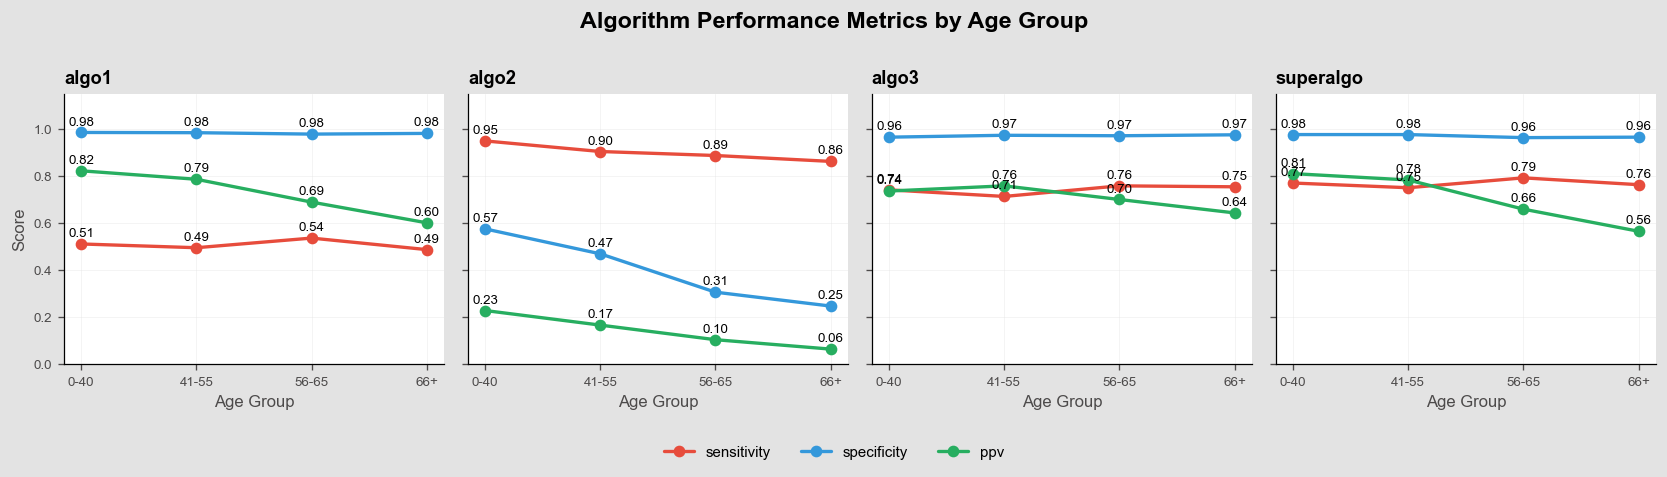

In [36]:
algos = ['algo1', 'algo2', 'algo3', 'superalgo']
metric_names = ['sensitivity', 'specificity', 'ppv']

# Ensure age groups are present (created earlier) and ordered
age_group_order = ['0-40', '41-55', '56-65', '66+']
age_groups_present = [ag for ag in age_group_order if ag in df['age_group'].unique()]

# Create side-by-side plots with shared y-axis
fig, axes = plt.subplots(1, len(algos), figsize=(14, 3.75), sharey=True)

for i, algo in enumerate(algos):
    ax = axes[i]
    for metric in metric_names:
        values = []
        for ag in age_groups_present:
            age_df = df[df['age_group'] == ag]
            m = evaluate_algorithm(age_df, pred_col=f'{algo}_answer', metrics=[metric])
            values.append(m[metric])
        ax.plot(range(len(age_groups_present)), values, marker='o', label=metric, linewidth=2, markersize=6)
        # Annotate points
        for j, val in enumerate(values):
            ax.text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

    ax.set_title(f'{algo}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Age Group', fontsize=10)
    ax.set_xticks(range(len(age_groups_present)))
    ax.set_xticklabels(age_groups_present)
    ax.grid(True, alpha=0.3)

# Shared y-axis setup
axes[0].set_ylabel('Score', fontsize=10)
axes[0].set_ylim(0, 1.15)

# Single legend for all subplots
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=9, bbox_to_anchor=(0.5, -0.1))

fig.suptitle('Algorithm Performance Metrics by Age Group', fontsize=14, fontweight='bold', y=.925,)

plt.tight_layout(rect=(0, 0, 1, 0.92))
fig.savefig('images/metrics_by_age_side_by_side_w_super.png', dpi=150, bbox_inches='tight')
plt.show()